In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Complete_datasets\emotions.csv')

In [3]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0


In [4]:
df['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [6]:
df['label']=df['label'].map({0:'sad',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'})

In [7]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,sad
1,i dont know i feel so lost,sad
2,i was beginning to feel quite disheartened,sad
3,i can still lose the weight without feeling de...,sad
4,im feeling a little like a damaged tree and th...,sad


In [8]:
df['label'].unique()

array(['sad', 'joy', 'love', 'anger', 'fear', 'surprise'], dtype=object)

In [9]:
df.isna().sum()

text     0
label    0
dtype: int64

In [10]:
df.duplicated().sum()

1

In [12]:
df.drop_duplicates(inplace=True)

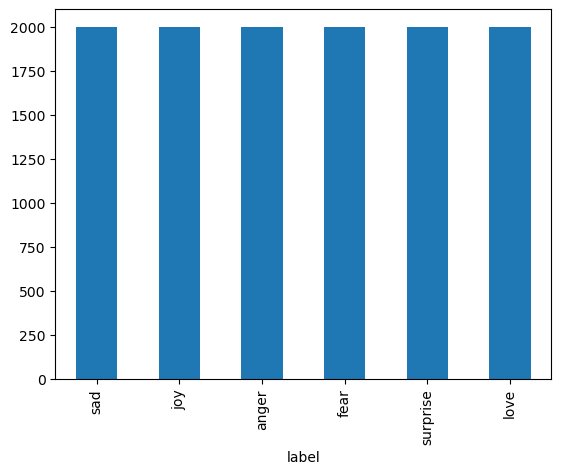

In [20]:
df['label'].value_counts().plot(kind='bar')
plt.show()

In [21]:
X=df['text']
y=df['label']

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [34]:
pipe=Pipeline([('Vector',TfidfVectorizer(stop_words='english')),('Estimator',MultinomialNB(alpha=6))])

In [35]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vector', TfidfVectorizer(stop_words='english')),
                ('Estimator', MultinomialNB(alpha=6))])

In [36]:
pipe.predict(X_test)

array(['sad', 'anger', 'sad', ..., 'surprise', 'joy', 'anger'],
      dtype='<U8')

## Creating Pickle file

In [37]:
import pickle

In [38]:
pickle.dump(pipe,open("estomator.pkl","wb"))

In [39]:
import os
os.getcwd()

'C:\\Users\\Admin\\ML_practice'

In [40]:
predict=pickle.load(open("estomator.pkl",'rb'))

In [45]:
predict.predict(['i am feeling lonely','i am exicited'])[1] 

'anger'